<a href="https://colab.research.google.com/github/1911521010UlfatmiHanifa/Kelompok7-APM/blob/main/K_Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount ('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA 
%matplotlib inline

In [3]:
dataset = pd.read_csv("drive/MyDrive/APM/csgoweapons2.csv")
dataset.head()

,Name,Team,Cost,Kill Award,Kills To Rebuy,Max Speed,RoF,Damage,DPS,Armor Penetration,...,Max Ammo,Reload (CR),Reload (FR),Recoil,Recoil (V),Recoil (H),Spread,Spread Run,Spread Stand,Spread Crouch
0,AK-47,T,$2700,$300,9.00,215,600,36,360,77.50%,...,90,1.20,2.5,30.0,0,70,0.6,175.06,6.41,4.81
1,AUG,CT,$3300,$300,11.00,220,667,28,311,90.00%,...,90,1.50,3.8,26.0,0,60,0.5,135.45,3.85,2.88
2,AWP,T,$4750,$100,47.50,200,41,115,79,97.50%,...,30,2.00,3.7,78.0,15,20,0.2,176.48,80.80,60.60
3,CZ75 Auto,T,$500,$300,1.67,240,600,33,300,77.65%,...,12,0.00,2.9,27.0,10,180,3.0,13.41,10.43,7.60
4,Desert Eagle,T,$700,$300,2.33,230,267,63,280,93.20%,...,35,0.88,2.3,48.2,18,60,2.0,48.10,4.20,2.18


In [4]:
#Menghapus Kolom yang tidak diperlukan
dataset.drop(['Name','Cost','Kill Award','Armor Penetration','Penetration','Recoil (V)','Recoil (H)','Max Speed',
              'Kills To Rebuy','RoF', 'Max Range', 'Clip Size', 'Max Ammo', 'Reload (CR)', 
              'Reload (FR)', 'Recoil', 'Spread', 'Spread Run', 'Spread Stand','Spread Crouch'],axis=1,inplace=True)
#Mengubah Isi dari Kolom dengan numerik
dataset['Team']=dataset.Team.map({'T':0,'CT':1})
dataset.head()

,Team,Damage,DPS
0,0,36,360
1,1,28,311
2,0,115,79
3,0,33,300
4,0,63,280


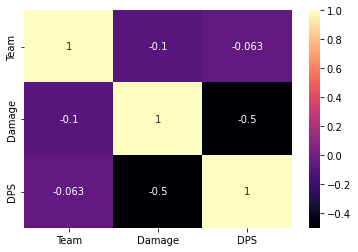

In [5]:
#membuat matrixplot dan menampilkan korelasi antar atribut
corr = dataset.corr()
sns.heatmap(corr,annot=True,cmap="magma")

In [6]:
#Menjalankan algoritma PCA dengan mendefinisikan variabel pca sebagai objek untuk PCA
pca = PCA(n_components=2)
dataset= pca.fit_transform(dataset)
dataset.shape

(32, 2)

In [7]:
#Menentukan dan menkonfigurasi fungsi kmeans.
km= KMeans(n_clusters=3,random_state=42)
km

KMeans(n_clusters=3, random_state=42)

In [8]:
#menampilkan array dari fungsi k-means
label = km.fit_predict(dataset)
label

array([0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0], dtype=int32)

In [9]:
#Menampilkan info baris dan kolom dari array yang telah dilakukan
label_0 = dataset[label == 0]
label_0.shape

(24, 2)

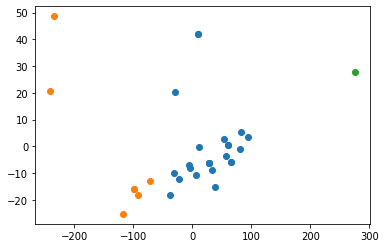

In [10]:
#Visualisasi pada plot dari array
label_0 = dataset[label == 0]
label_1 = dataset[label == 1]
label_2 = dataset[label == 2]

plt.scatter(label_0[:,0],label_0[:,1])
plt.scatter(label_1[:,0],label_1[:,1])
plt.scatter(label_2[:,0],label_2[:,1])

plt.show()

In [11]:
#Menentukan Sum of Square Error
sse= []
for k in range(1,10):
    km= KMeans(n_clusters=k,random_state=42)
    km.fit_predict(dataset)
    sse.append(km.inertia_)
sse

[299691.57010342076,
 132900.10155117835,
 73597.38752125084,
 34440.21555570521,
 16012.279115426898,
 10159.930859004297,
 5967.326973123763,
 4556.509723370822,
 3251.4604995576688]

Text(0, 0.5, 'Sum of Squared Error')

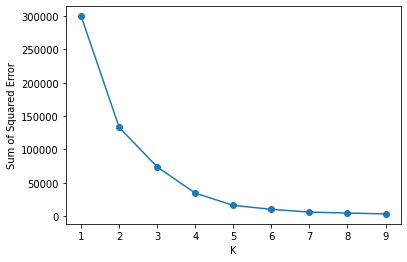

In [12]:
#Visualisasi SSE
plt.plot(range(1,10),sse,marker='o')
plt.xlabel('K')
plt.ylabel('Sum of Squared Error')

In [22]:
#Menentukan dan menkonfigurasi fungsi kmeans clustering
km = KMeans(n_clusters=5,random_state=42)
label = km.fit_predict(dataset)

u_labels= np.unique(label)

centroids= km.cluster_centers_
centroids

array([[  -9.67829678,    3.76234752],
       [ -95.96537694,  -17.72076945],
       [ 275.26363228,   27.76864766],
       [  55.4561269 ,   -3.29519654],
       [-237.51977818,   34.67223795]])

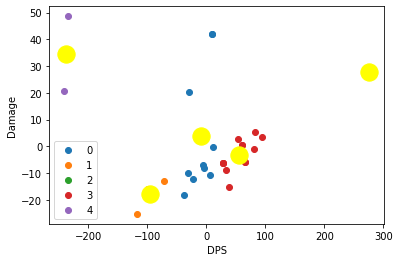

In [25]:
#Visualisasi Clustering
for i in u_labels:
    plt.scatter(dataset[label == i , 0] , dataset[label == i , 1] , label = i)
    plt.legend()
plt.scatter(centroids[:,0] , centroids[:,1] , s=300, color = 'yellow') 
plt.xlabel('DPS') 
plt.ylabel('Damage')
plt.show()